# **Exploring Student Performance Factors**

In [1]:
# Import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

# Load dataset
data_path = path + "/StudentPerformanceFactors.csv"  # Adjust filename if necessary
data = pd.read_csv(data_path)

100%|██████████| 93.9k/93.9k [00:00<00:00, 27.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/8


## Intial Data Analysis

In [25]:
# To find the exact number of rows and columns, df.shape gives result in the form of (rows,columns)
print(data.shape)

(6607, 20)


In [3]:
data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# Basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Check for Missing Values and Duplicates

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


### Check Data Types and Unique Values in Categorical Columns

In [7]:
# Check data types
data.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


In [8]:
# Check unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

Parental_Involvement: ['Low' 'Medium' 'High']
Access_to_Resources: ['High' 'Medium' 'Low']
Extracurricular_Activities: ['No' 'Yes']
Motivation_Level: ['Low' 'Medium' 'High']
Internet_Access: ['Yes' 'No']
Family_Income: ['Low' 'Medium' 'High']
Teacher_Quality: ['Medium' 'High' 'Low' nan]
School_Type: ['Public' 'Private']
Peer_Influence: ['Positive' 'Negative' 'Neutral']
Learning_Disabilities: ['No' 'Yes']
Parental_Education_Level: ['High School' 'College' 'Postgraduate' nan]
Distance_from_Home: ['Near' 'Moderate' 'Far' nan]
Gender: ['Male' 'Female']


## **Data Analysis**

## **Initial Data Analysis(IDA)**

### Average Hours Studied

In [9]:
avg_hours_studied = data['Hours_Studied'].mean()
print(f"Average Hours Studied: {avg_hours_studied}")


Average Hours Studied: 19.975329196306948


### Average Sleep Hours

In [ ]:
avg_sleep_hours = data['Sleep_Hours'].mean()
print(f"Average Sleep Hours: {avg_sleep_hours}")

Average Sleep Hours: 7.029060087785682


### Average Attendance

In [ ]:
avg_attendance = data['Attendance'].mean()
print(f"Average Attendance: {avg_attendance}")

Average Attendance: 79.97744816104132


### Tutoring Sessions Summary

In [ ]:
avg_tutoring_sessions = data['Tutoring_Sessions'].mean()
print(f"Average Tutoring Sessions: {avg_tutoring_sessions}")


Average Tutoring Sessions: 1.4937187831088239


### Distribution of Parental Involvement

In [ ]:
parental_dist = data['Parental_Involvement'].value_counts()
print(parental_dist)

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


### Students by School Type

In [ ]:
school_type_dist = data['School_Type'].value_counts()
school_type_dist

,count
School_Type,
Public,4598
Private,2009


Public schools have more than twice the number of students compared to private schools.

In [26]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## **Exploratory Data analysis(EDA)**

### Parental Involvement and Exam Scores

In [ ]:
parental_exam_scores = data.groupby('Parental_Involvement')['Exam_Score'].mean()
print(parental_exam_scores)

Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64


Exam scores improve as parental involvement increases, with a noticeable upward trend from "Low" to "High."

### Motivation Level Impact on Exam Scores

In [ ]:
motivation_exam_scores = data.groupby('Motivation_Level')['Exam_Score'].mean()
print(motivation_exam_scores)

Motivation_Level
High      67.704321
Low       66.752194
Medium    67.330648
Name: Exam_Score, dtype: float64


Exam scores improve as motivation level increases, with the highest scores achieved by highly motivated students.

### Teacher Quality and Exam Scores

In [ ]:
teacher_quality_scores = data.groupby('Teacher_Quality')['Exam_Score'].mean()
print(teacher_quality_scores)

Teacher_Quality
High      67.676939
Low       66.753425
Medium    67.109299
Name: Exam_Score, dtype: float64


Exam scores improve as teacher quality increases, with the highest scores observed under high-quality teaching.

## **Data Visualization**

### Distribution of Exam Scores

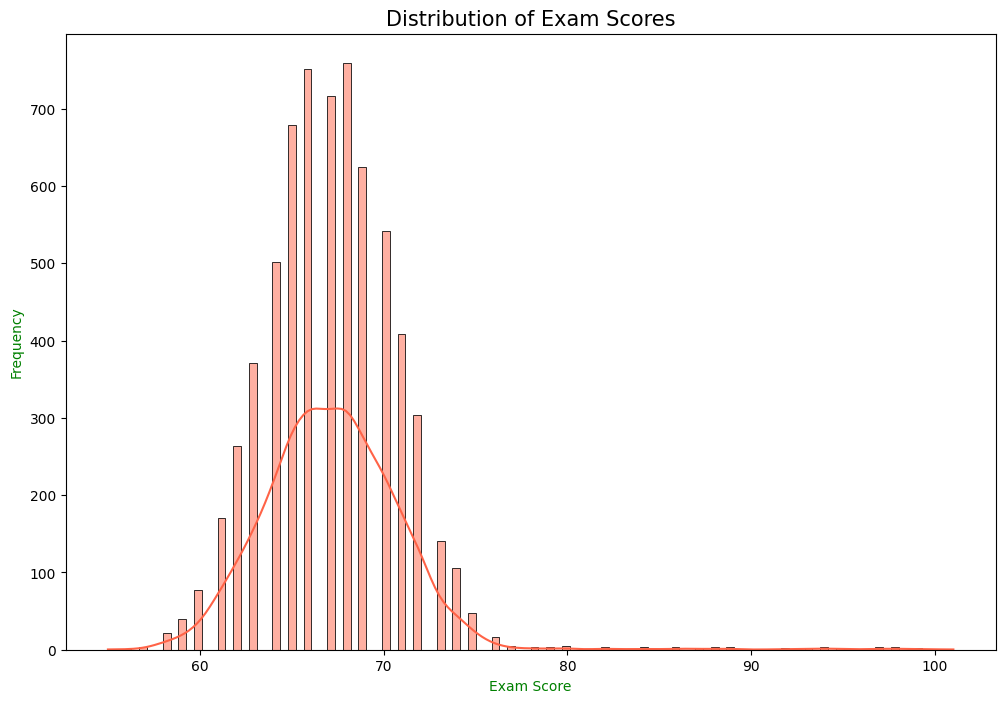

In [29]:
# Distribution of Exam_Score
plt.figure(figsize=(12, 8),dpi=100)
sns.histplot(data['Exam_Score'], kde=True, color='tomato')
plt.title("Distribution of Exam Scores",fontsize=15)
plt.xlabel("Exam Score",color='green')
plt.ylabel("Frequency",color='green')
plt.show()

The distribution of exam scores appears to be approximately normal, centered around a score of 65-70, with a slight right skew. This suggests that most students score around the average range, with fewer students achieving very high or very low scores.

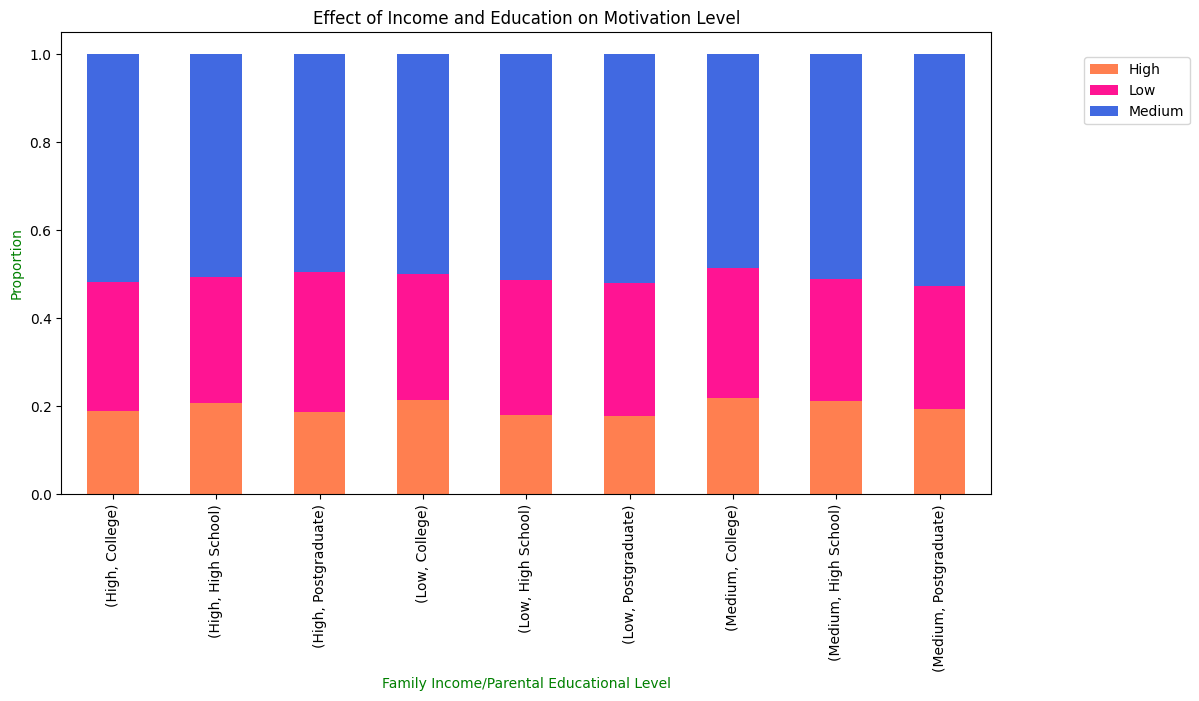

In [30]:
color=['Coral','deeppink','royalblue']
combination_effect = data.groupby(['Family_Income', 'Parental_Education_Level'])['Motivation_Level'].value_counts(normalize=True).unstack()
combination_effect.plot(kind='bar', stacked=True, figsize=(12, 6),color=color)
plt.title("Effect of Income and Education on Motivation Level")
plt.ylabel("Proportion",color='green')
plt.xlabel("Family Income/Parental Educational Level",color='green')
plt.legend(loc=(1.1,0.8))
plt.show()

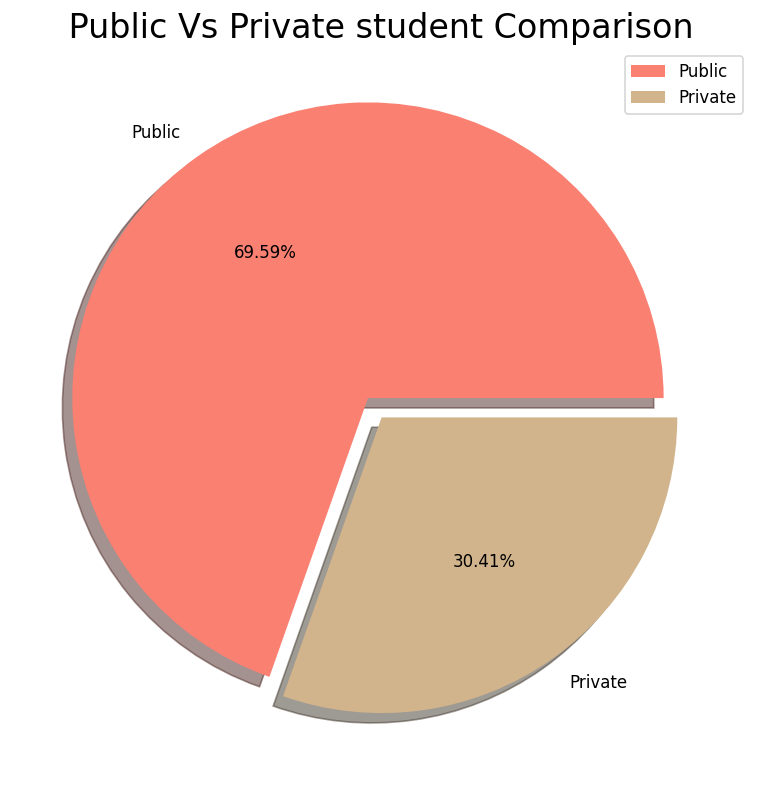

In [33]:
plt.figure(figsize=(12,8),dpi=120)
size=data["School_Type"].value_counts()
labels='Public','Private'
color='salmon','tan'
explode=[0.08,0]
plt.pie(size,colors=color,labels=labels,explode=explode,autopct='%.2f%%',shadow=True)
plt.title(" Public Vs Private student Comparison ",size=20)
plt.legend()

The dataset reveals that 69.59% of students are from public schools, while only 30.41% are from private schools, indicating a significant majority in the public sector.

This distribution highlights the importance of examining potential performance disparities between public and private school students.

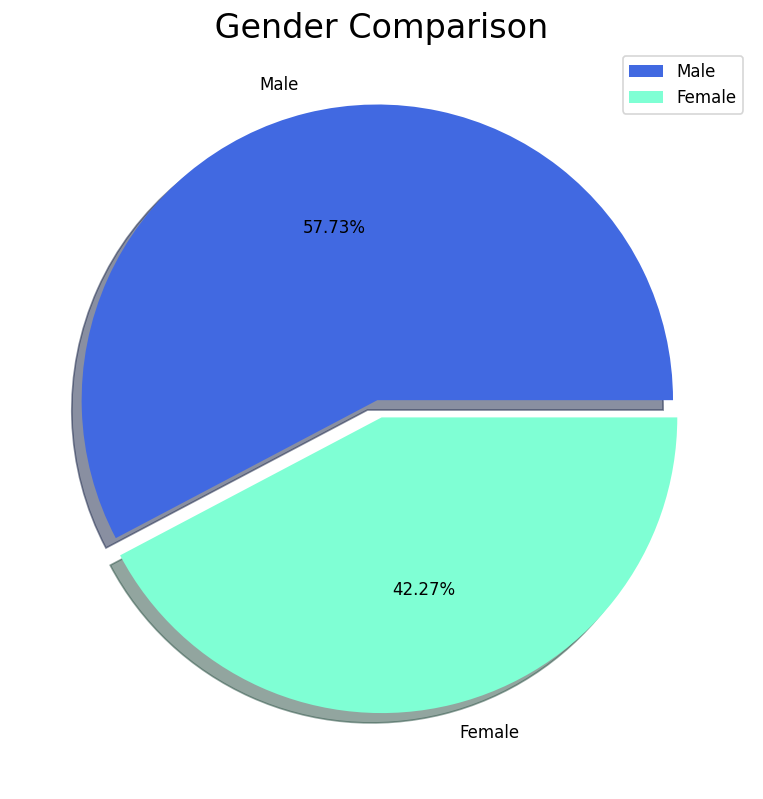

In [35]:
plt.figure(figsize=(12,8),dpi=120)
size=data["Gender"].value_counts()
labels='Male','Female'
color='royalblue','aquamarine'
explode=[0.06,0]
plt.pie(size,colors=color,labels=labels,explode=explode,autopct='%.2f%%',shadow=True)
plt.title(" Gender Comparison ",size=20)
plt.legend()

The dataset displays male domination with 57.73% compared to females with 42.27%.

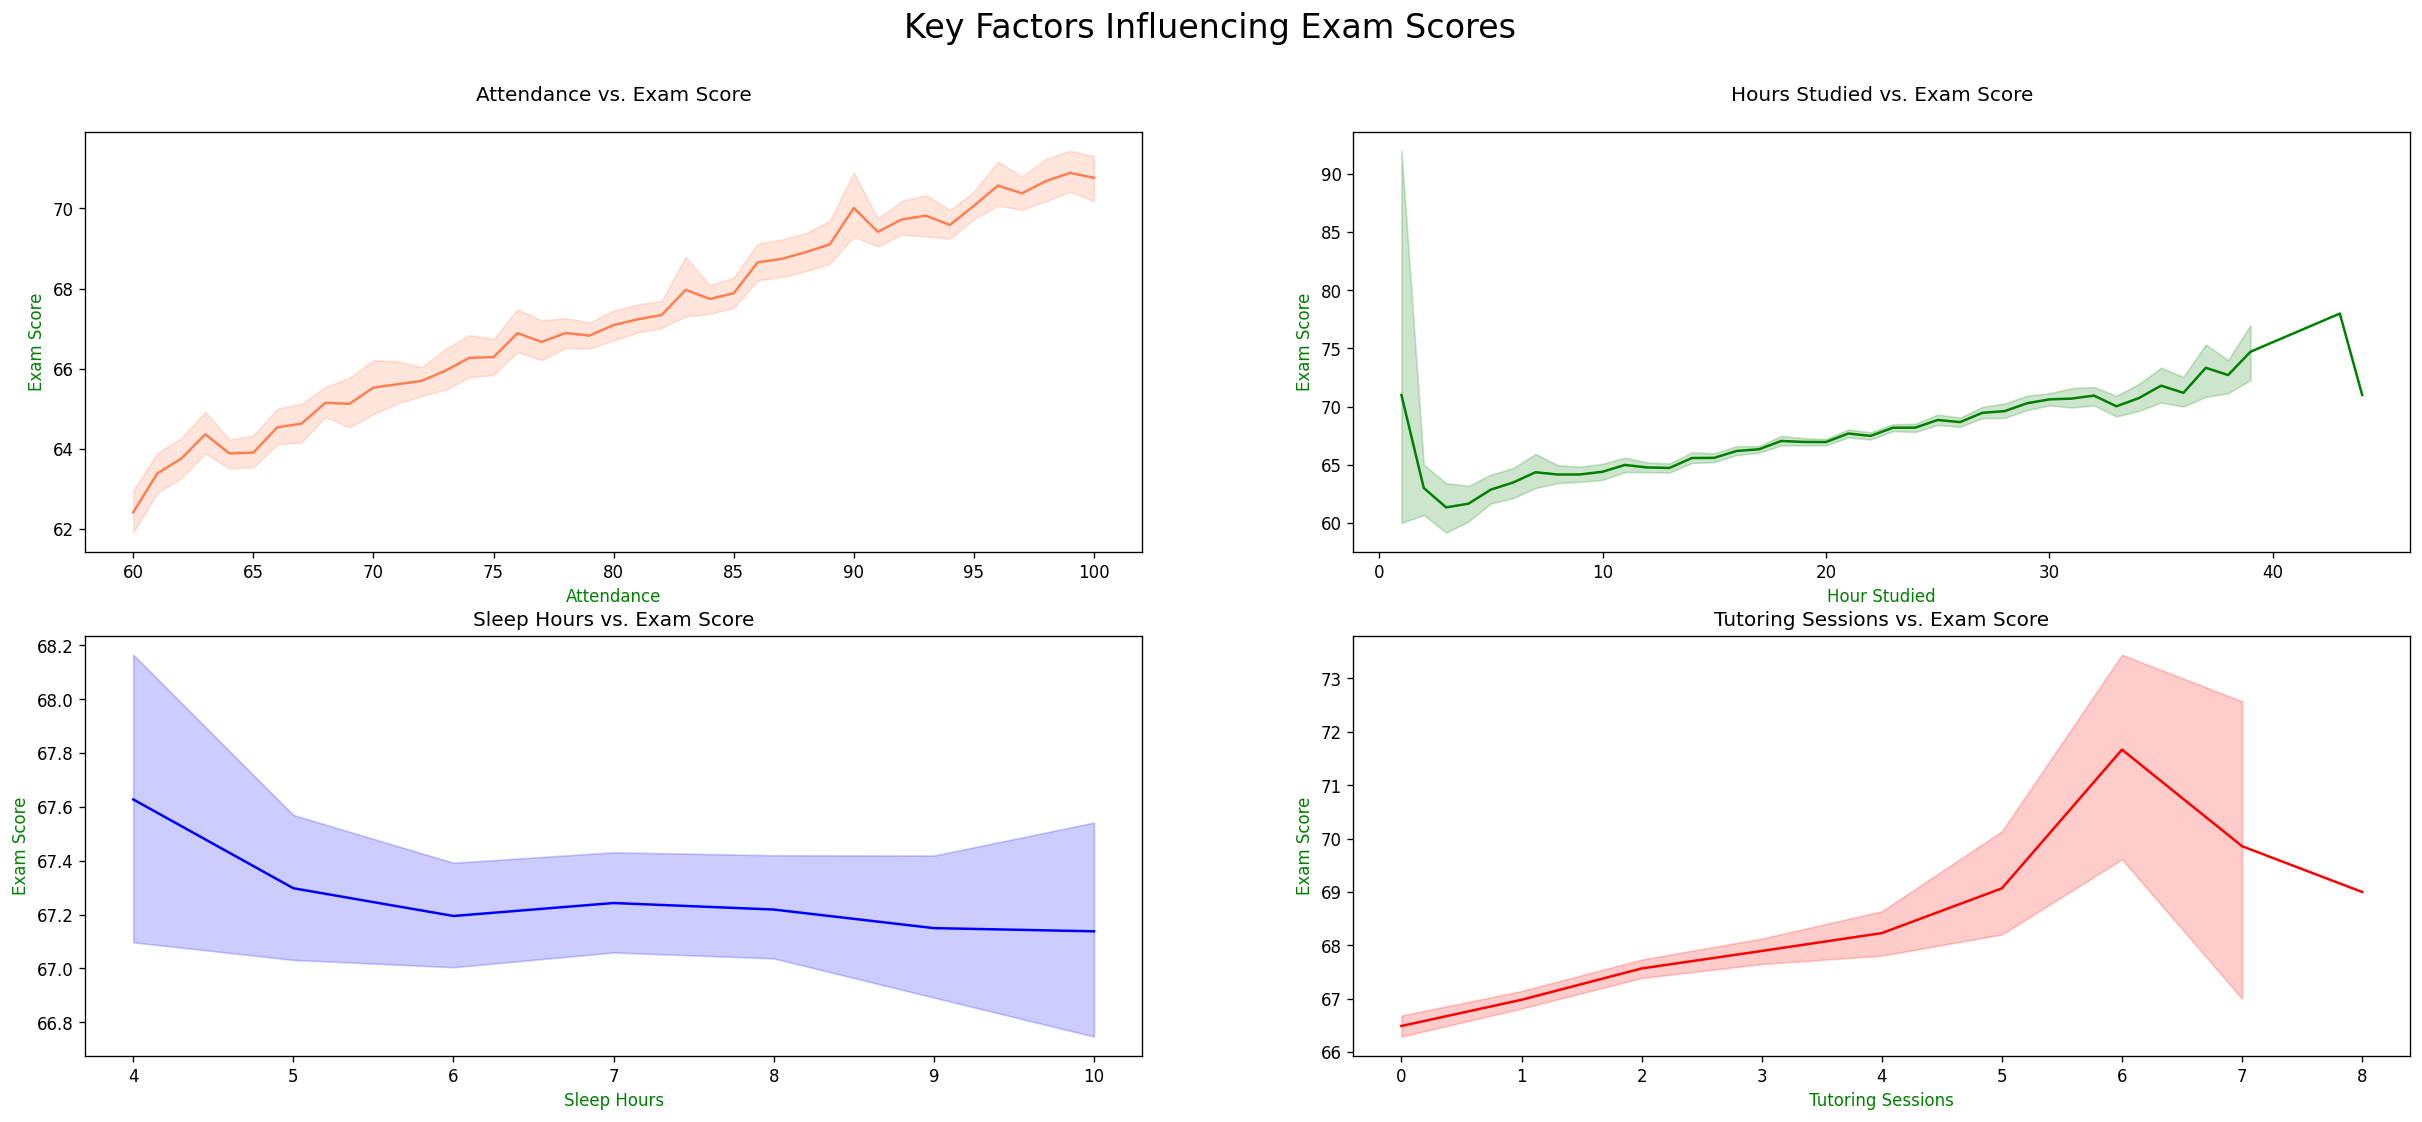

In [38]:
# Joint plot to observe Attendance correlation with Exam_Score
plt.figure(figsize=(25,10),dpi=120)
plt.subplot(2,2,1)
sns.lineplot(x='Attendance', y='Exam_Score', data=data, color="coral")
plt.title("Attendance vs. Exam Score", y=1.05)
plt.xlabel('Attendance',color='green')
plt.ylabel('Exam Score',color='green')

plt.subplot(2,2,2)
sns.lineplot(x='Hours_Studied', y='Exam_Score', data=data, color="Green")
plt.title("Hours Studied vs. Exam Score", y=1.05)
plt.xlabel('Hour Studied',color='green')
plt.ylabel('Exam Score',color='green')

plt.subplot(2,2,3)
sns.lineplot(x='Sleep_Hours', y='Exam_Score', data=data, color="blue")
plt.title("Sleep Hours vs. Exam Score")
plt.xlabel('Sleep Hours',color='green')
plt.ylabel('Exam Score',color='green')

plt.subplot(2,2,4)
sns.lineplot(x='Tutoring_Sessions', y='Exam_Score', data=data, color="red")
plt.title("Tutoring Sessions vs. Exam Score")
plt.xlabel('Tutoring Sessions',color='green')
plt.ylabel('Exam Score',color='green')

plt.suptitle("Key Factors Influencing Exam Scores",size=20)
plt.show()


**Attendance vs. Exam Score:** A positive correlation is evident, as higher attendance leads to improved exam scores, showcasing the importance of consistent class participation.

**Hours Studied vs. Exam Score:** Exam scores initially decrease with very low study hours but steadily improve beyond 10 hours of study, emphasizing the benefit of consistent study practices.

**Sleep Hours vs. Exam Score:** The exam score appears relatively stable across varying sleep durations, with slight dips, suggesting sleep has a minimal impact within normal ranges.

**Tutoring Sessions vs. Exam Score:** An increase in tutoring sessions generally boosts exam scores, peaking around 6 sessions, after which a decline is observed, indicating potential diminishing returns beyond a certain point.

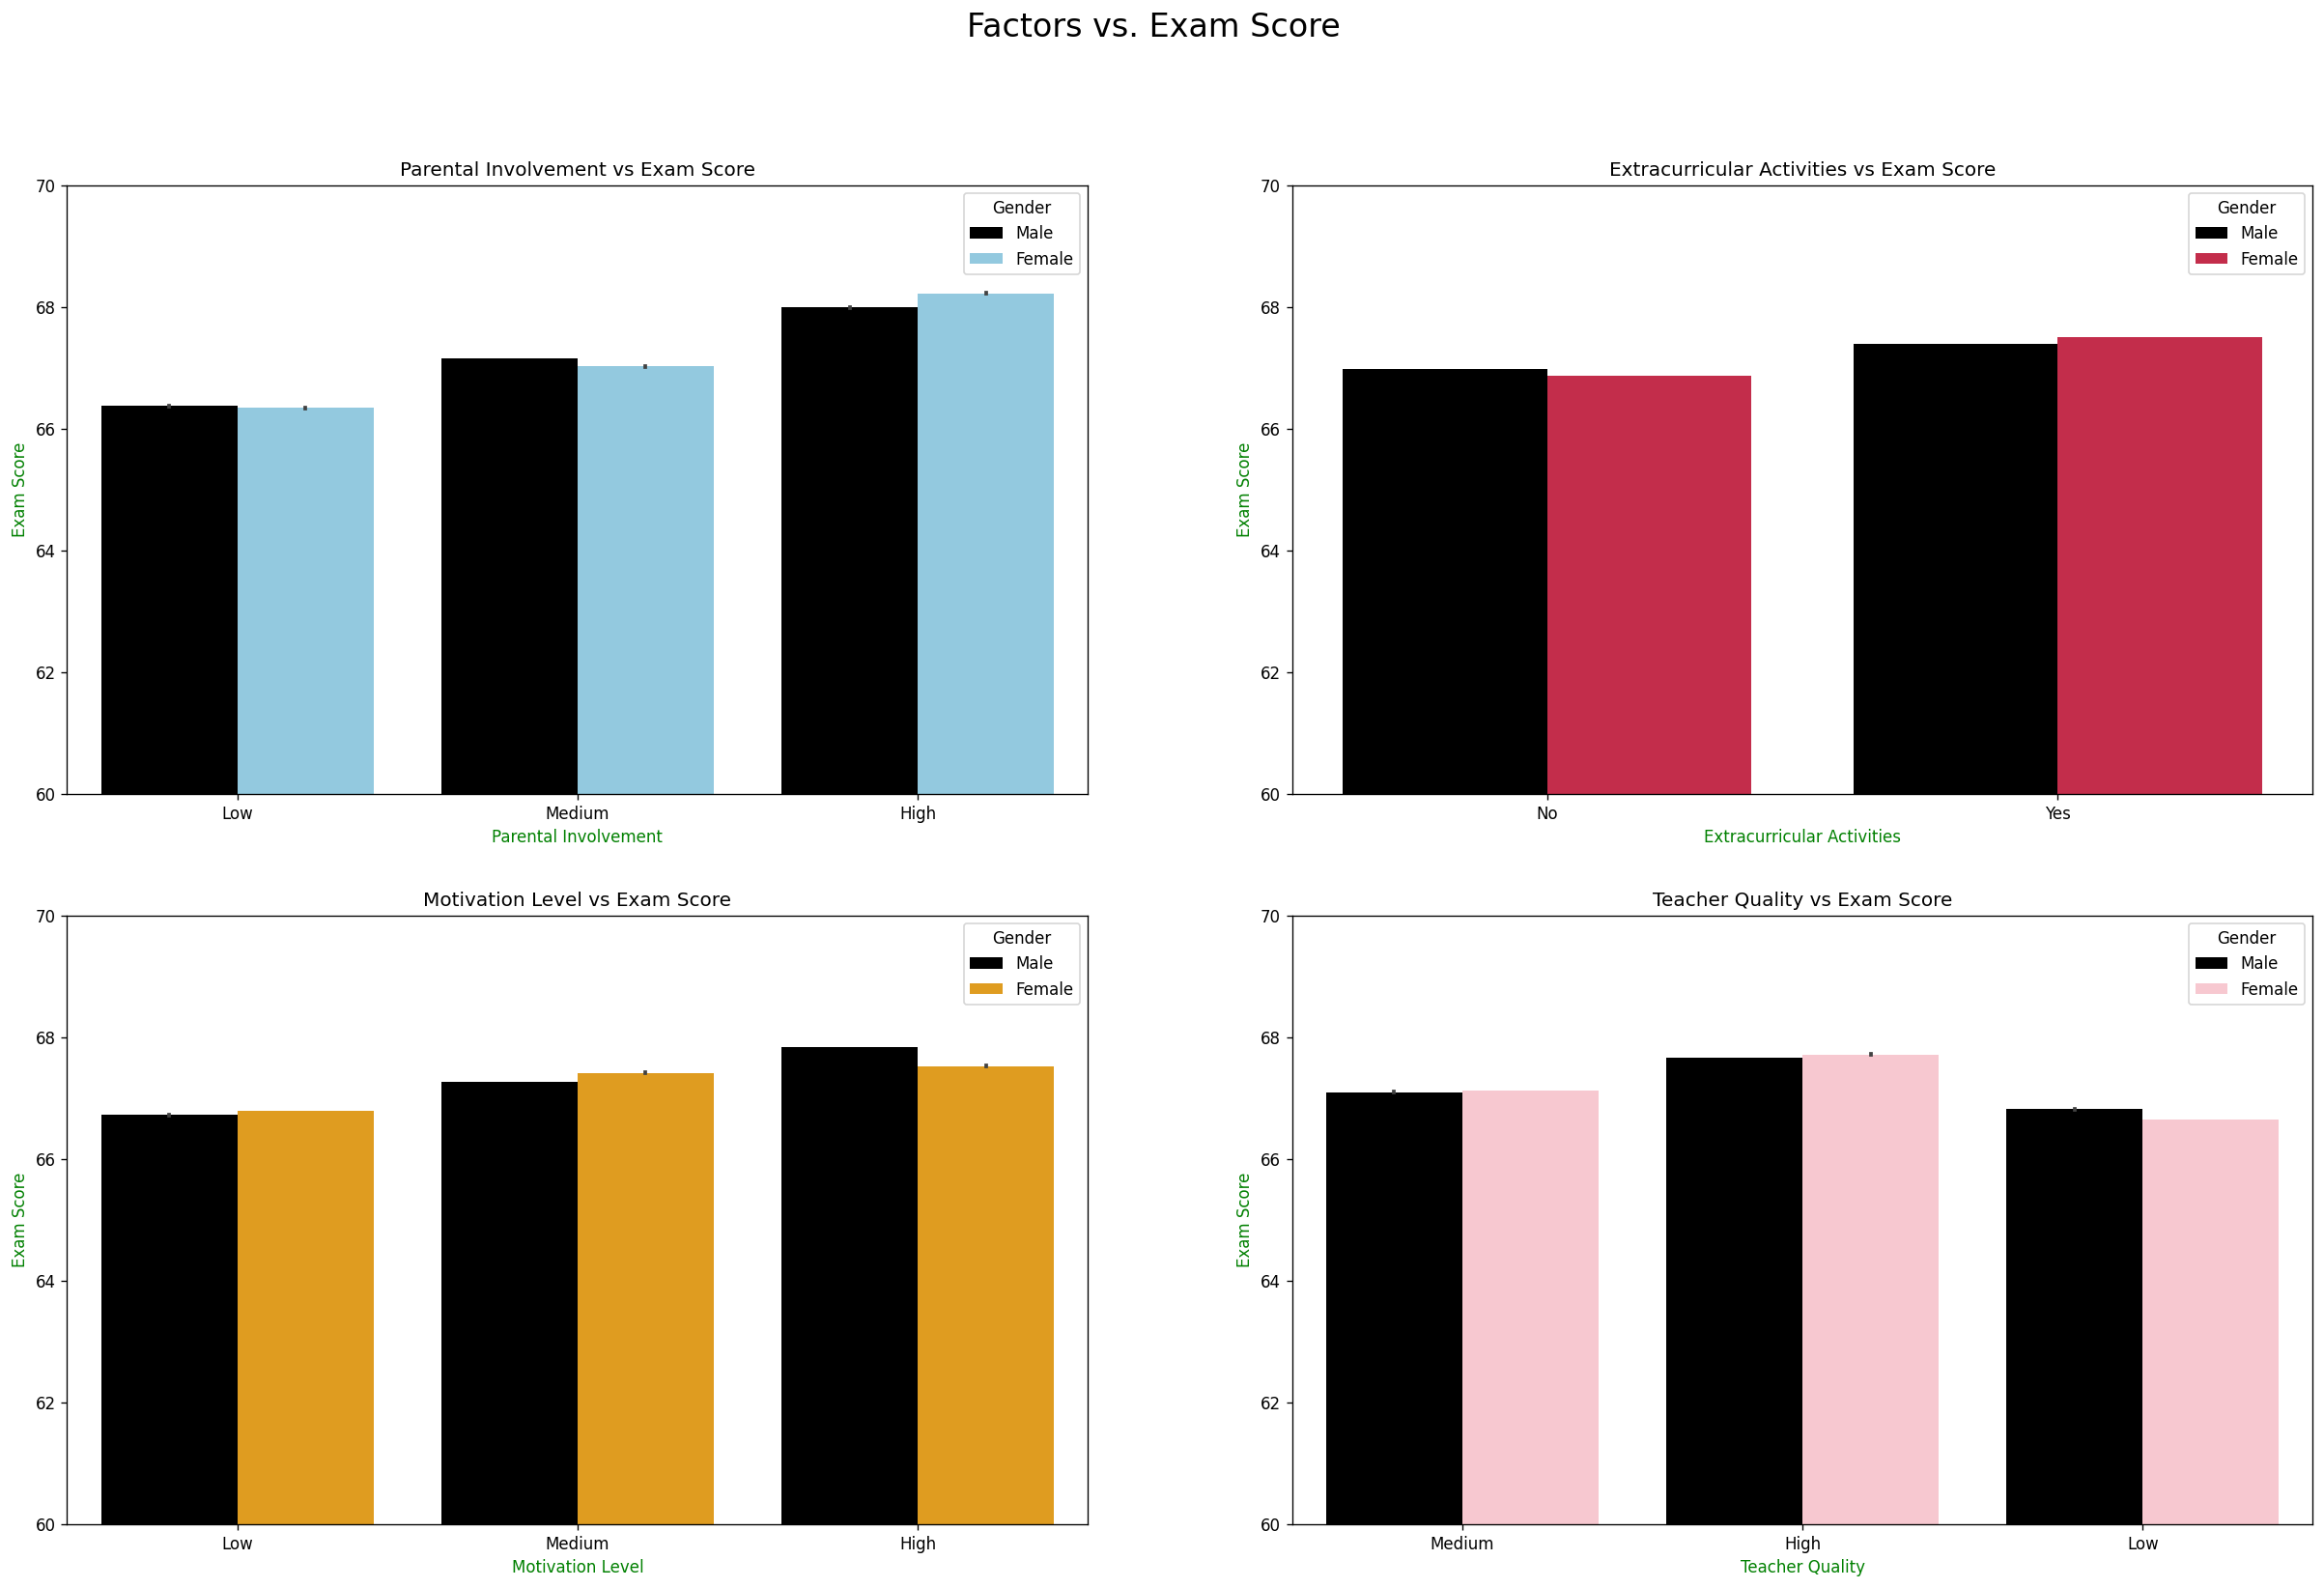

In [40]:
plt.figure(figsize=(25,15),dpi=120)

plt.subplot(2,2,1)
palette=['black','skyblue']
sns.barplot(x='Parental_Involvement', y='Exam_Score',estimator='mean', data=data,errorbar=('ci', 3),hue='Gender',palette=palette)
plt.title('Parental Involvement vs Exam Score')
plt.xlabel('Parental Involvement',color='green')
plt.ylabel('Exam Score',color='green')
plt.ylim(60,70)

plt.subplot(2,2,2)
palette=['black','crimson']
sns.barplot(x='Extracurricular_Activities', y='Exam_Score',estimator='mean', data=data,errorbar=('ci', 3),hue='Gender',palette=palette)
plt.title('Extracurricular Activities vs Exam Score')
plt.xlabel('Extracurricular Activities',color='green')
plt.ylabel('Exam Score',color='green')
plt.ylim(60,70)

plt.subplot(2,2,3)
palette=['black','orange']
sns.barplot(x='Motivation_Level', y='Exam_Score',estimator='mean', data=data,errorbar=('ci', 3),hue='Gender',palette=palette)
plt.title('Motivation Level vs Exam Score')
plt.xlabel('Motivation Level',color='green')
plt.ylabel('Exam Score',color='green')
plt.ylim(60,70)


plt.subplot(2,2,4)
palette=['black','pink']
sns.barplot(x='Teacher_Quality', y='Exam_Score',estimator='mean', data=data,errorbar=('ci', 3),hue='Gender',palette=palette)
plt.title('Teacher Quality vs Exam Score')
plt.xlabel('Teacher Quality',color='green')
plt.ylabel('Exam Score',color='green')
plt.ylim(60,70)


plt.suptitle("Factors vs. Exam Score",fontsize=20)
plt.show()


**Parental Involvement vs Exam Score:** High parental involvement positively impacts exam scores for both genders, with a slightly stronger effect observed in females.

**Extracurricular Activities vs Exam Score:** Participation in extracurricular activities has a modest positive effect on exam performance, irrespective of gender.

**Motivation Level vs Exam Score:** Higher motivation levels are strongly associated with better exam scores for all students, with females showing a marginal advantage.

**Teacher Quality vs Exam Score:** Higher teacher quality significantly improves exam performance for both genders, with females exhibiting slightly better results.

## **Machine Learning**

### Predicting whether a student will score above a threshold (e.g., 60) using a classification model.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------------------------------
Accuracy: 0.9969742813918305
--------------------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       1.00      1.00      1.00      1298

    accuracy                           1.00      1322
   macro avg       0.98      0.94      0.96      1322
weighted avg       1.00      1.00      1.00      1322

--------------------------------------------------------------------------


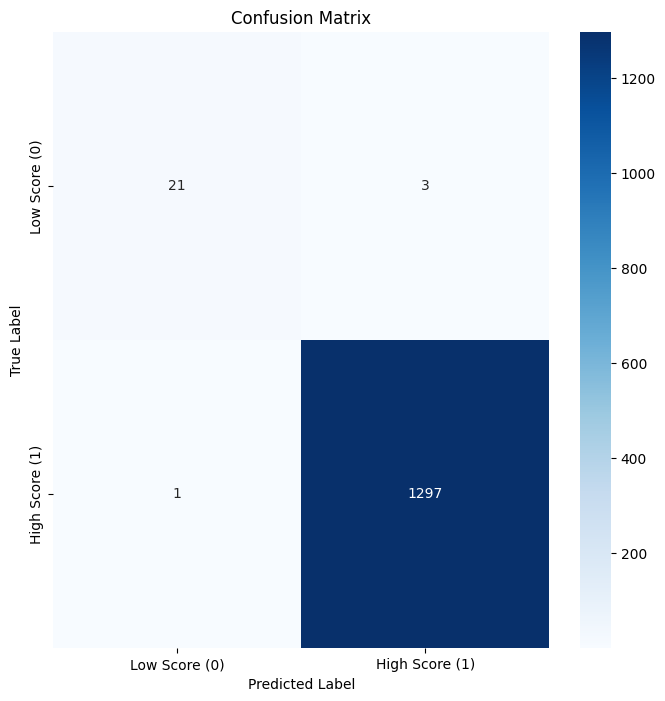

In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Step 1: Create a binary target variable
data['High_Score'] = (data['Exam_Score'] > 60).astype(int)

# Step 2: Select features and target
features = data.drop(['Exam_Score', 'High_Score'], axis=1)
target = data['High_Score']

# Step 3: Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 5: Train a logistic regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
print("--------------------------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Score (0)', 'High Score (1)'],
            yticklabels=['Low Score (0)', 'High Score (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Target Variable:** A new column, High_Score, is created to classify students scoring above 60 (1) and below or equal to 60 (0).

**Feature Engineering:** Categorical variables are encoded using pd.get_dummies to prepare data for the logistic regression model.

**Train-Test Split:** Data is split into training (80%) and testing (20%) subsets.
Model Training: Logistic Regression is chosen for its simplicity and interpretability for binary classification tasks.

**Evaluation:** The model is evaluated using accuracy, a classification report, and a confusion matrix to assess its performance.

The model achieved a high accuracy of 99.6%, indicating excellent overall classification performance.

### Clustering students into groups based on "Hours Studied", "Attendance", and "Exam Score".

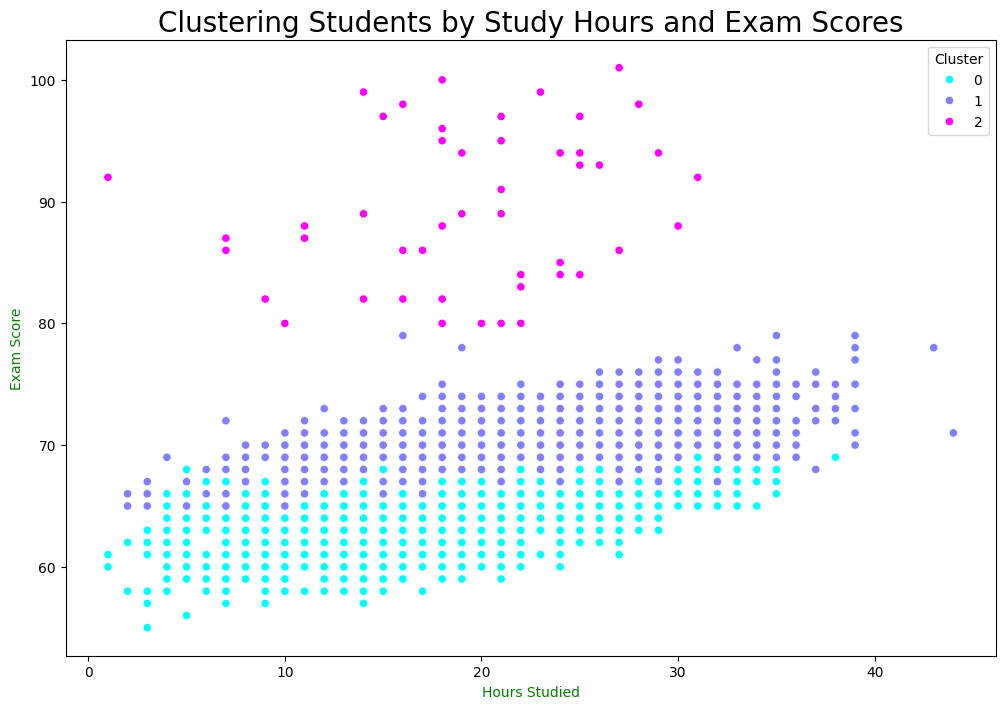

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_data = data[['Hours_Studied', 'Attendance', 'Exam_Score']]
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Visualize clusters
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Cluster', data=data, palette='cool')
plt.title("Clustering Students by Study Hours and Exam Scores",fontsize=20)
plt.xlabel("Hours Studied",color='green')
plt.ylabel("Exam Score",color='green')
plt.show()


# **Conclusion**



Boosting student motivation can positively influence academic performance, though the impact is slightly smaller compared to parental involvement.

Higher teacher quality significantly improves exam performance for both genders, with females exhibiting slightly better results.

Encouraging and supporting higher parental involvement can positively impact students' academic outcomes.

Participation in extracurricular activities provides a smaller but consistent benefit.

Across all factors, females consistently achieve slightly higher scores compared to males.

Interventions focusing on improving these factors—especially teacher quality, motivation, and parental involvement—can enhance student performance overall.
